In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from transformations import Transformations
from operations import Operations
from object import Object

In [2]:
transform = Transformations()
operations = Operations()

p1 = np.array([0,0,0,1], dtype=float)
p2 = np.array([0,0,4,1], dtype=float)
p3 = np.array([9,0,0,1], dtype=float)
p4 = np.array([0,1,0,1], dtype=float)

o = Object([p1,p2,p3,p4])
print o

{
	[ 0.  0.  0.  1.]
	[ 0.  0.  4.  1.]
	[ 9.  0.  0.  1.]
	[ 0.  1.  0.  1.]
}


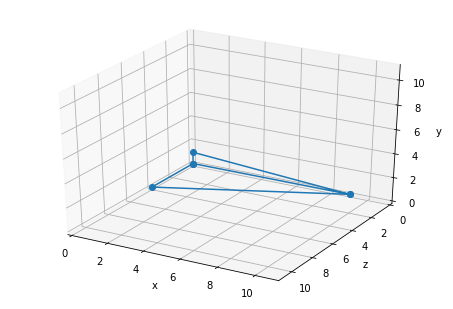

In [3]:
o.show()

# Questão 1

## Matriz de Escala

In [4]:
S = transform.buildScaleMatrix(np.array([0.78567,7.07106,1.76776], dtype=float))
print "S,\n", S

S,
[[ 0.78567  0.       0.       0.     ]
 [ 0.       7.07106  0.       0.     ]
 [ 0.       0.       1.76776  0.     ]
 [ 0.       0.       0.       1.     ]]


O',
{
	[ 0.  0.  0.  1.]
	[ 0.       0.       7.07104  1.     ]
	[ 7.07103  0.       0.       1.     ]
	[ 0.       7.07106  0.       1.     ]
}


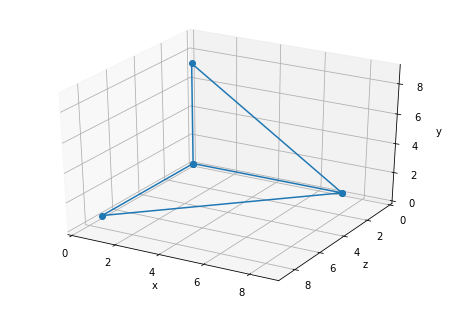

In [5]:
transform.transform(o,S)
print "O',\n", o
o.show()

Para verificar as distâncias na questão 1

In [6]:
print "p2 - p3", operations.distance(o.points[1], o.points[2])
print "p2 - p4", operations.distance(o.points[1], o.points[3])
print "p3 - p4", operations.distance(o.points[2], o.points[3])

p2 - p3 9.99995359702
p2 - p4 9.99997481023
p3 - p4 9.99996773917


# Questão 2

### Transformações

1. Rotacionar para que a face P2,P3,P4 fique no "chão"
   - Levar P3 para origem **(Matriz T3)**
   - Rotacionar
     - Qual ângulo?
     - Pra onde?
   - Voltar P3 pro lugar **(Matrz T3n)**
6. Girar em torno do eixo z pra deixar na inclinação certa
7. Levar P3 pra posição final [**P3b: (35,15,0)**]. **Matriz(T3f)**

Para fazer a rotação em torno do eixo P3-P4 esse eixo deve passar pela origem, então vamos leva P3 para origem

In [7]:
T3 = transform.buildTranslateMatrix(np.array([-o.points[2][0], 0, 0, 1],dtype=float))
print "T3,\n", T3

T3,
[[ 1.       0.       0.      -7.07103]
 [ 0.       1.       0.       0.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


O'',
{
	[-7.07103  0.       0.       1.     ]
	[-7.07103  0.       7.07104  1.     ]
	[ 0.  0.  0.  1.]
	[-7.07103  7.07106  0.       1.     ]
}


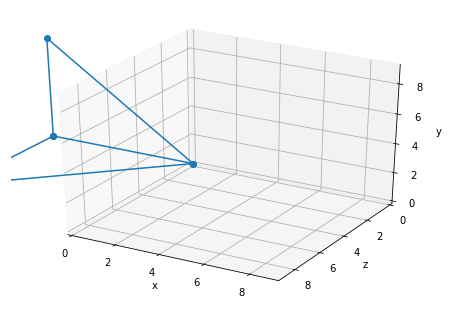

In [8]:
transform.transform(o,T3)
print "O'',\n", o
o.show()

### Deitar a face P2, P3, P4 no plano XY
Girar em torno do eixo y, 135°

Girar em torno do eixo x, angulo *theta ($\theta$)*

In [9]:
R1 = transform.buildRotateMatrix(135, Transformations.AXIS_Y)
print "R1,\n", R1

R1,
[[-0.70710678  0.          0.70710678  0.        ]
 [ 0.          1.          0.          0.        ]
 [-0.70710678  0.         -0.70710678  0.        ]
 [ 0.          0.          0.          1.        ]]


O'',
{
	[ 4.99997326  0.          4.99997326  1.        ]
	[  9.99995360e+00   0.00000000e+00  -7.07106781e-06   1.00000000e+00]
	[ 0.  0.  0.  1.]
	[ 4.99997326  7.07106     4.99997326  1.        ]
}


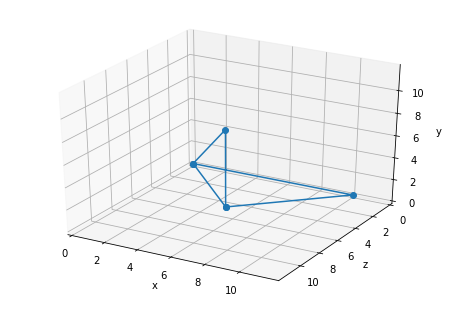

In [10]:
transform.transform(o,R1)
print "O'',\n", o
o.show()

#### Angulo $\theta$ entre a face P2, P3, P4 e o plano XY é dado por $P4*j = |P4|.|j|.cos(\theta)$

In [11]:
j = [0,1,0,0]
P4 = o.points[3]
print "P4 ", P4
print "P4 * j = ", np.inner(P4,j)
print "norm(P4) = ", operations.norm(P4)
theta = math.degrees(math.acos(np.inner(P4,j)/operations.norm(P4)))
print theta

P4  [ 4.99997326  7.07106     4.99997326  1.        ]
P4 * j =  7.07106
norm(P4) =  10.0498435204
45.2835285738


In [12]:
R2 = transform.buildRotateMatrix(-theta, Transformations.AXIS_X)
print "R2,\n", R2

R2,
[[ 1.          0.          0.          0.        ]
 [ 0.          0.70359901  0.71059723  0.        ]
 [ 0.         -0.71059723  0.70359901  0.        ]
 [ 0.          0.          0.          1.        ]]


O'',
{
	[ 4.99997326  3.55296716  3.51797626  1.        ]
	[  9.99995360e+00  -5.02468122e-06  -4.97519635e-06   1.00000000e+00]
	[ 0.  0.  0.  1.]
	[ 4.99997326  8.52815801 -1.5066994   1.        ]
}


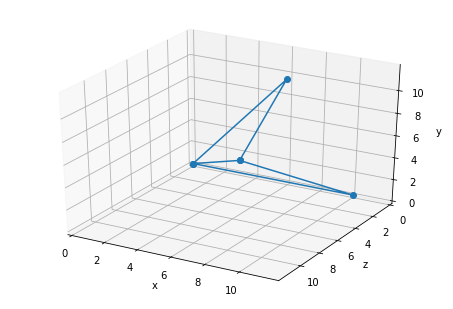

In [13]:
transform.transform(o,R2)
print "O'',\n", o
o.show()

### Encontrar a inclinação P3P2

Essa inclinação é definida pelo produto do vetor P3 com o vetor unitário *î*

$P3*î = |P3|.|î|.cos(\alpha)$

In [14]:
i = [1,0,0,0]
P3b = [35,15,0,1]
print "P3b ", P4
print "P3b * i = ", np.inner(P3b,i)
print "norm(P3b) = ", operations.norm(P3b)
alpha = math.degrees(math.acos(np.inner(P3b,i)/operations.norm(P3b)))
print alpha

P3b  [ 4.99997326  7.07106     4.99997326  1.        ]
P3b * i =  35
norm(P3b) =  38.0919939095
23.2446235916


In [15]:
R3 = transform.buildRotateMatrix(alpha, Transformations.AXIS_Z)
print "R3,\n", R3

R3,
[[ 0.91882825 -0.39465764  0.          0.        ]
 [ 0.39465764  0.91882825  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


O'',
{
	[ 3.19191104  5.23784423  3.51797626  1.        ]
	[  9.18824182e+00   3.94655346e+00  -4.97519635e-06   1.00000000e+00]
	[ 0.  0.  0.  1.]
	[ 1.22841396  9.80919012 -1.5066994   1.        ]
}


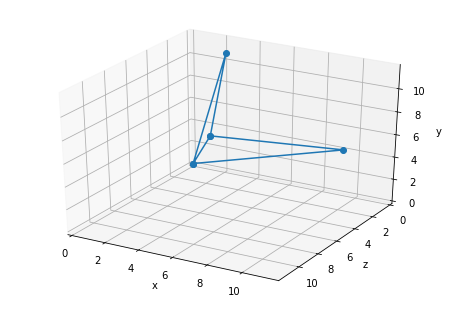

In [16]:
transform.transform(o,R3)
print "O'',\n", o
o.show()

### Transladar para a posição P3b

In [17]:
T3b = transform.buildTranslateMatrix(np.array([35, 15, 0, 1],dtype=float))
print "T3,\n", T3b

T3,
[[  1.   0.   0.  35.]
 [  0.   1.   0.  15.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


O'',
{
	[ 38.19191104  20.23784423   3.51797626   1.        ]
	[  4.41882418e+01   1.89465535e+01  -4.97519635e-06   1.00000000e+00]
	[ 35.  15.   0.   1.]
	[ 36.22841396  24.80919012  -1.5066994    1.        ]
}


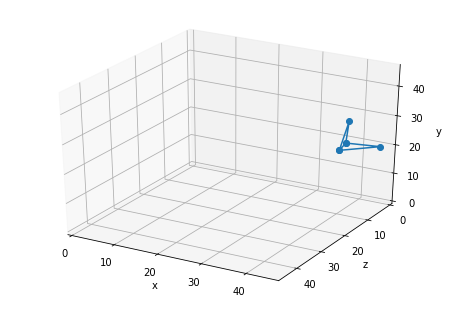

In [18]:
transform.transform(o,T3b)
print "O'',\n", o
o.show()

# Questão 3

#### Temos que calcular o vetor normal a face P1P2P4

Para isso é necessário fazer o produto vetorial de 2 vetores desse plano, usaremos P1P2 e P1P4

In [19]:
A = o.points[1] - o.points[0]
B = o.points[3] - o.points[0]

n = operations.vectorialProduct([1,2,3],[4,5,6])
operations.normalize(n)
print n

[-0.408248290463863, 0.816496580927726, -0.408248290463863, 0]


In [20]:
M = transform.buildMirrorAbrMatrix(n)
print "M ", M

M  [[ 0.66666667  0.66666667 -0.33333333  0.        ]
 [ 0.66666667 -0.33333333  0.66666667  0.        ]
 [-0.33333333  0.66666667  0.66666667  0.        ]
 [ 0.          0.          0.          1.        ]]


O'',
{
	[ 37.78051143  21.06064346   3.10657665   1.        ]
	[ 42.08986518  23.14330674  -2.09838162   1.        ]
	[ 33.33333333  18.33333333  -1.66666667   1.        ]
	[ 41.19396919  14.87807967   3.45885582   1.        ]
}


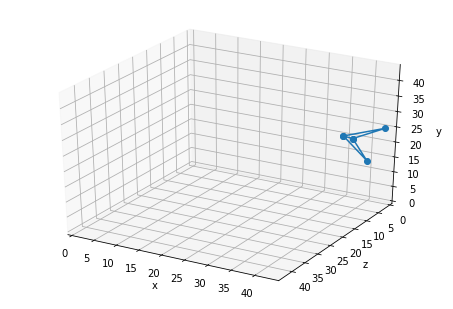

In [21]:
transform.transform(o,M)
print "O'',\n", o
o.show()